## Capstone Project: Marketing and Retail Analytics

### Project Abstract and Objective

OList is an e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. 

After gaining insights from the dataset, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

This process involves:
#### <font color=brown>1. Data exploration and cleaning
#### <font color=brown>2. Data visualisation
#### <font color=brown>3. Market basket analysis
#### <font color=brown>4. Data Reporting: Dashboards and presentation
 

### Step1: Import the libraries and the dataset

In [2]:
#Import all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# list all the columns
pd.options.display.max_columns = None

# list all the rows
pd.options.display.max_rows = None

In [3]:
# Import the excel sheet and read the data
cp_orders=pd.read_excel("Retail_dataset.xlsx",sheet_name = "orders")
cp_orders.shape

(99441, 7)

In [4]:
#are order_id unique?
cp_orders.order_id.duplicated().sum()

0

In [5]:
#are customer_id unique
cp_orders.customer_id.value_counts(normalize=True)

8d50f5eadf50201ccdcedfb9e2ac8455    0.000171
3e43e6105506432c953e165fb2acf44c    0.000091
1b6c7548a2a1f9037c1fd3ddfed95f33    0.000070
ca77025e7201e3b30c44b472ff346268    0.000070
6469f99c1f9dfae7733b25662e7f1782    0.000070
de34b16117594161a6a89c50b289d35a    0.000060
47c1a3033b8b77b3ab6e109eb4d5fdf3    0.000060
63cfc61cee11cbe306bff5857d00bfe4    0.000060
12f5d6e1cbf93dafd9dcc19095df0b3d    0.000060
f0e310a6839dce9de1638e0fe5ab282a    0.000060
dc813062e0fc23409cd255f7f53c7074    0.000060
35ecdf6858edc6427223b64804cf028e    0.000050
74cb1ad7e6d5674325c1f99b5ea30d82    0.000050
394ac4de8f3acb14253c177f0e15bc58    0.000050
b4e4f24de1e8725b74e4a1f4975116ed    0.000050
4e65032f1f574189fb793bac5a867bbc    0.000050
5e8f38a9a1c023f3db718edcf926a2db    0.000050
fe81bb32c243a86b2f86fbf053fe6140    0.000050
56c8638e7c058b98aae6d74d2dd6ea23    0.000050
795c1622cf7a53d63d324e862349d01c    0.000040
d3359a56d96666ac0c21bb01e7a61c95    0.000040
a1874c5550d2f0bc14cc122164603713    0.000040
a7657330b1

In [6]:
# only intrested in "Delivered" orders

cp_orders = cp_orders[cp_orders.order_status == 'delivered']
cp_orders.shape

(96478, 7)

In [7]:
cp_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1  53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
2  47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
3  949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
4  ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_timestamp order_estimated_delivery_date  
0       2017-10-10 21:25:13                    2017-10-18  
1       2018-08-07 15:27:45                    2018-08-13  
2       2018-08-17 18:06:29                    2018-09-04  
3       2017-12-02 00:28:42                    2017-12-15  
4       2018-02-16 18:17:02                    2018-02-26

### Step2: Cleaning the dataset

In [8]:
# Are there any missing values?
cp_orders.isna().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [9]:
#Replacing the missing values
cp_orders.order_approved_at.fillna(cp_orders.order_purchase_timestamp, inplace=True)

In [10]:
cp_orders.isna().sum().sort_values(ascending=False)

order_delivered_timestamp        8
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_estimated_delivery_date    0
dtype: int64

In [11]:
#Replacing the missing values
cp_orders.order_delivered_timestamp.fillna(cp_orders.order_estimated_delivery_date, inplace=True)

In [12]:
cp_orders.isna().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

#### Import order_items

In [13]:
cp_order_items=pd.read_excel("Retail_dataset.xlsx",sheet_name = "order_items")
cp_order_items.shape

(112650, 6)

In [14]:
cp_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id   price  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   58.90   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36  239.90   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d  199.00   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   12.99   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87  199.90   

   shipping_charges  
0             13.29  
1             19.93  
2             17.87  
3             12.79  
4             18.14

In [15]:
cp_order_items.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

#### Import Customers

In [16]:
cp_customers = pd.read_excel("Retail_dataset.xlsx",sheet_name = "customers")
cp_customers.shape

(99441, 4)

In [17]:
cp_customers.head()

customer_id  customer_zip_code_prefix  \
0  861eff4711a542e4b93843c6dd7febb0                     14409   
1  290c77bc529b7ac935b93aa66c333dc3                      9790   
2  060e732b5b29e8181a18229c7b0b2b5e                      1151   
3  259dac757896d24d7702b9acbbff3f3c                      8775   
4  345ecd01c38d18a9036ed96c73b8d066                     13056   

           customer_city customer_state  
0                 franca             SP  
1  sao bernardo do campo             SP  
2              sao paulo             SP  
3        mogi das cruzes             SP  
4               campinas             SP

In [18]:
cp_customers.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [19]:
#is customer_id duplicate?
cp_customers.customer_id.duplicated().sum()

3345

In [20]:
cp_customers.drop_duplicates(subset='customer_id', keep="first", inplace=True)

In [21]:
# validate the duplicate num of rows, it should match with value in cell no 39, i.e 3345
99441 - 96096 

3345

#### <font color=brown> Checkpoint: We have removed all the duplicate rows.

In [22]:
cp_customers.shape

(96096, 4)

#### Import Payments

In [23]:
cp_payments = pd.read_excel("Retail_dataset.xlsx",sheet_name = "payments")
cp_payments.shape

(103886, 5)

In [24]:
cp_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [25]:
cp_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### No duplicate rows in Payments tab. 

#### Import Products

In [26]:
cp_products = pd.read_excel("Retail_dataset.xlsx",sheet_name = "products")
cp_products.shape

(32951, 6)

In [27]:
cp_products.head()

product_id product_category_name  product_weight_g  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumery             225.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                   art            1000.0   
2  96bd76ec8810374ed1b65e291975717f        sports_leisure             154.0   
3  cef67bcfe19066a932b7673e239eb23d                  baby             371.0   
4  9dc1a7de274444849c219cff195d0b71            housewares             625.0   

   product_length_cm  product_height_cm  product_width_cm  
0               16.0               10.0              14.0  
1               30.0               18.0              20.0  
2               18.0                9.0              15.0  
3               26.0                4.0              26.0  
4               20.0               17.0              13.0

In [28]:
#check the null values
cp_products.isna().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [29]:
#verify the product distribution count
round((cp_products.product_category_name.value_counts(normalize=True)*100),2)

toys                                       75.42
bed_bath_table                              2.41
sports_leisure                              2.20
furniture_decor                             2.10
health_beauty                               1.98
housewares                                  1.92
auto                                        1.49
computers_accessories                       1.30
watches_gifts                               1.02
telephony                                   0.87
baby                                        0.75
stationery                                  0.72
perfumery                                   0.69
fashion_bags_accessories                    0.65
cool_stuff                                  0.59
garden_tools                                0.56
pet_shop                                    0.52
electronics                                 0.47
luggage_accessories                         0.31
office_furniture                            0.30
construction_tools_c

#### <font color=brown> Key Insight: 75% of the sales are covered from <font color=Black>Toys <font color=brown> amongst all the Product cateogry

#### Therefore it would be fare to replace all the remaining null values with mode value.

In [30]:
#Check the mode value
cp_products.product_category_name.mode()[0]

'toys'

In [31]:
#replace the null values with toys[mode]
cp_products.product_category_name.fillna(cp_products.product_category_name.mode()[0], inplace=True)

In [32]:
cp_products.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [33]:
#also verify that product id is duplicated or not
cp_products.product_id.duplicated().sum()

0

In [34]:
#check the null values again
cp_products.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [35]:
#Check the product info
cp_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


#### We can observe, many of the Dtypes are float

In [36]:
cp_products.describe()

product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

#### We can observe discrepancy between the 50 percentile and mean value, let us plot graphs and validate

In [37]:
#Insert all the numerical values into a table
product_cols = cp_products.describe().columns
product_cols

Index(['product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm'],
      dtype='object')

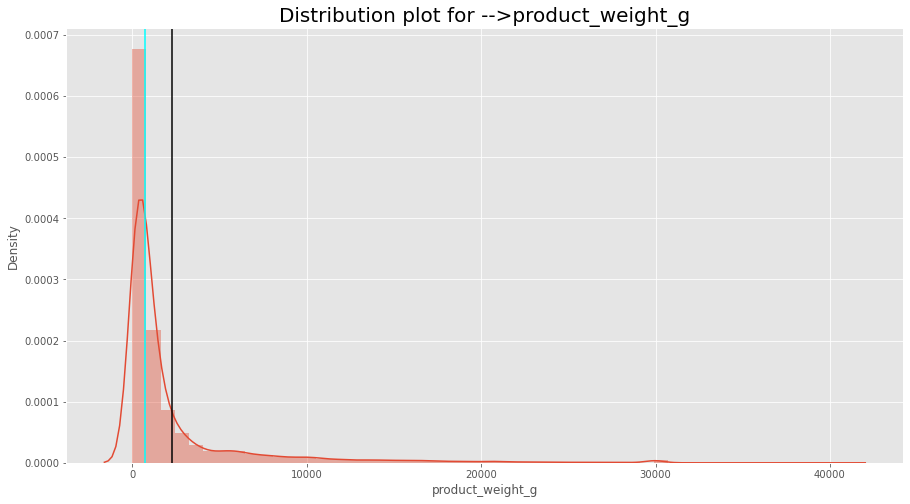

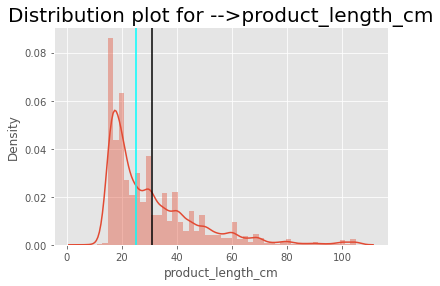

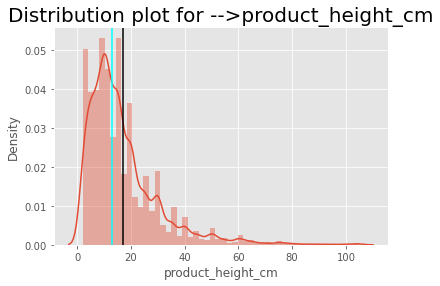

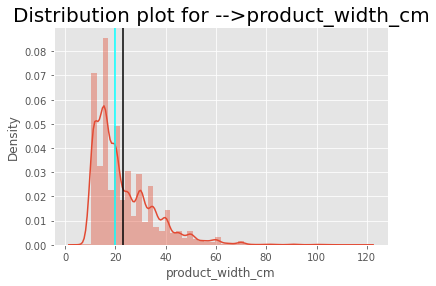

In [38]:
#Draw a dist plot for all types numerical values

plt.style.use("ggplot")
plt.figure(figsize=(15,8))
for i in product_cols:
    plt.title("Distribution plot for -->"+i,fontdict={'fontsize': 20,'fontweight': 6,'color': 'Black'})
    sns.distplot(cp_products[i])
    
    plt.axvline(cp_products[i].mean(), color='black')
    plt.axvline(cp_products[i].median(), color="cyan")
    plt.show()
    print("="*100)

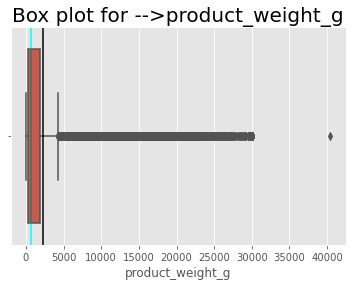

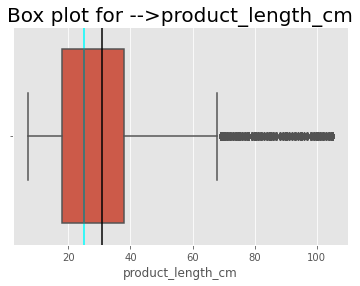

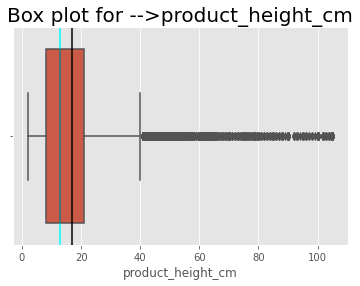

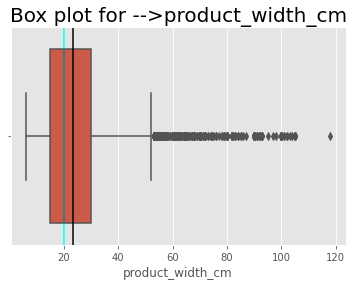

In [39]:
#Let us validate the discrepancy as outlier as well
plt.style.use("ggplot")
for i in product_cols:
    plt.title("Box plot for -->"+i,fontdict={'fontsize': 20,'fontweight': 6,'color': 'Black'})
    sns.boxplot(cp_products[i])
    plt.axvline(cp_products[i].mean(), color='black')
    plt.axvline(cp_products[i].median(), color="cyan")
    plt.show()
    print("="*100)

In [40]:
#Replace all the values with median.
for i in product_cols:
    cp_products[i].fillna(cp_products[i].median(), inplace=True)

In [41]:
cp_products.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

#### Data is cleaned, now we can export all the data into seperate files for our visualization

### Step3: Export all the dataframes to one spreadsheet

In [43]:
# Generating Excel writer with XlsxWriter.
writer = pd.ExcelWriter('Cleaned_Retaildataset_v1.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
with pd.ExcelWriter('Cleaned_Retaildataset_v1.xlsx') as writer:
    cp_orders.to_excel(writer, sheet_name='Orders')
    cp_order_items.to_excel(writer, sheet_name='Order_items')
    cp_customers.to_excel(writer, sheet_name='Customers')
    cp_payments.to_excel(writer, sheet_name='Payments')
    cp_products.to_excel(writer, sheet_name='Products')
    

# Close the Pandas Excel writer and output the Excel file.
writer.save()
print("~File exported successfully~")

~File exported successfully~
